<a href="https://colab.research.google.com/github/costpetrides/Forecasting-Temperature-with-Prophet-and-ML-Models/blob/main/Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly
import plotly.express as px
import plotly.graph_objects as go
import cufflinks as cf
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

df = pd.read_csv("/content/DailyDelhiClimateTrain.csv",
                 parse_dates=['date'],  # change to date time format
                 index_col="date")

df = df[['meantemp', 'humidity', 'wind_speed']]
df.head()

,meantemp,humidity,wind_speed
date,,,
2013-01-01,10.000,84.500,0.000
2013-01-02,7.400,92.000,2.980
2013-01-03,7.167,87.000,4.633
2013-01-04,8.667,71.333,1.233
2013-01-05,6.000,86.833,3.700


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmppisi9p8e/iingsnct.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppisi9p8e/cp7wkg91.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90621', 'data', 'file=/tmp/tmppisi9p8e/iingsnct.json', 'init=/tmp/tmppisi9p8e/cp7wkg91.json', 'output', 'file=/tmp/tmppisi9p8e/prophet_modelgxj54vz3/prophet_model-20240831090719.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:07:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:07:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Test MSE: 2.752
Test R²: 0.914


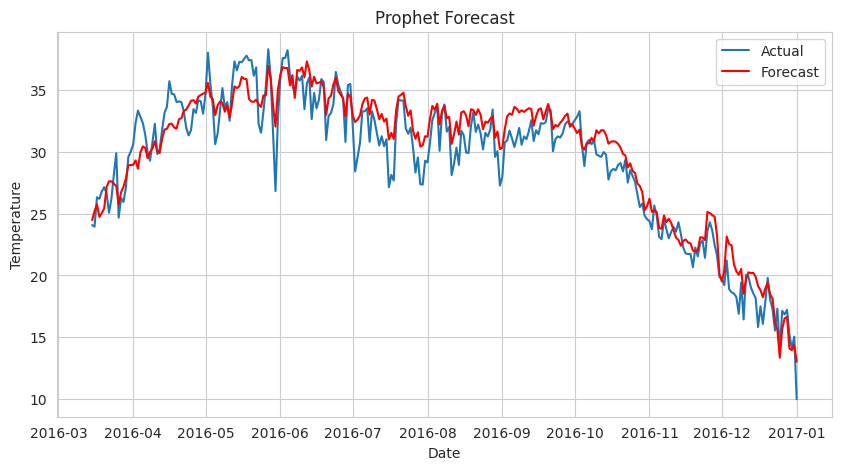

In [17]:
from prophet import Prophet
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

df_prophet = df.reset_index().rename(columns={'date': 'ds', 'meantemp': 'y'})
df_prophet['humidity'] = df['humidity'].values
df_prophet['wind_speed'] = df['wind_speed'].values

# Split the data into training and testing sets
train_size = int(len(df_prophet) * 0.8)
p_train, p_test = df_prophet.iloc[:train_size], df_prophet.iloc[train_size:]

prop_model = Prophet()
prop_model.add_regressor('humidity')
prop_model.add_regressor('wind_speed')
prop_model.fit(p_train)

future = prop_model.make_future_dataframe(periods=len(p_test), freq='D')
future['humidity'] = df['humidity'].values
future['wind_speed'] = df['wind_speed'].values

forecast = prop_model.predict(future)

# Extract the forecasted values (test period)
predicted = forecast[['ds', 'yhat']].set_index('ds').loc[p_test['ds']]

mse = mean_squared_error(p_test['y'], predicted['yhat'])
r2 = r2_score(p_test['y'], predicted['yhat'])
print('Test MSE: %.3f' % mse)
print('Test R²: %.3f' % r2)

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(p_test['ds'], p_test['y'], label='Actual')
plt.plot(predicted.index, predicted['yhat'], color='red', label='Forecast')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Prophet Forecast')
plt.legend()
plt.show()


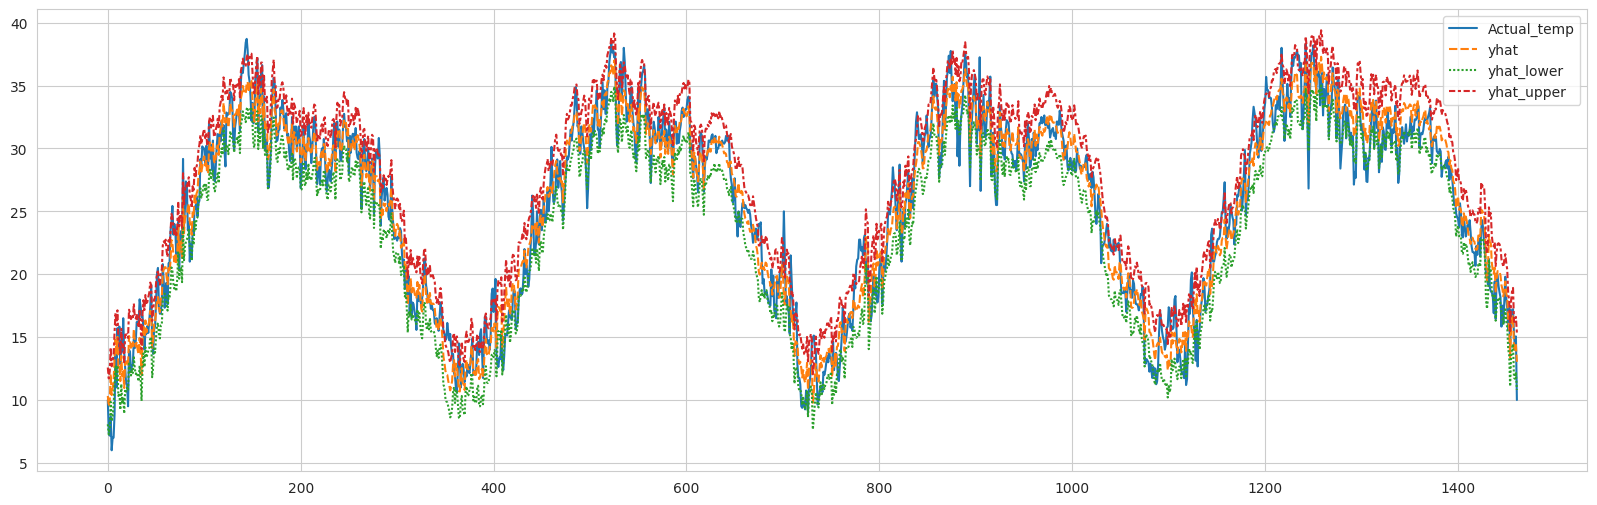

In [16]:
from prophet.plot import plot_plotly
import plotly.offline as py

plt.figure(figsize=(20,6))
sns.lineplot(data = forecast[['Actual_temp', 'yhat', 'yhat_lower','yhat_upper']]);
plot_plotly(prop_model, forecast)